In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_evaluation.csv')

In [3]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.shape

(1727, 7)

In [7]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [10]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [11]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [13]:
cols = ['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']



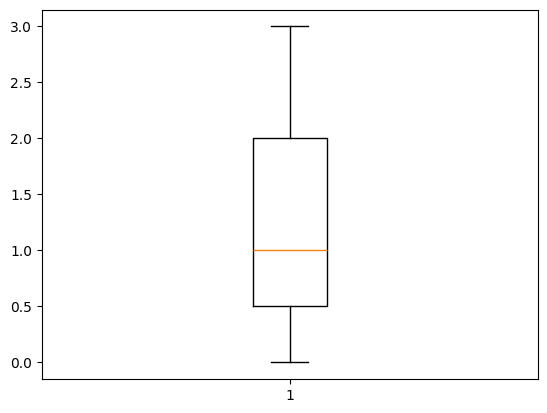

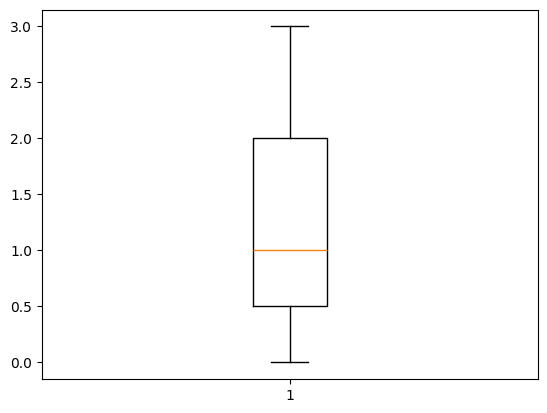

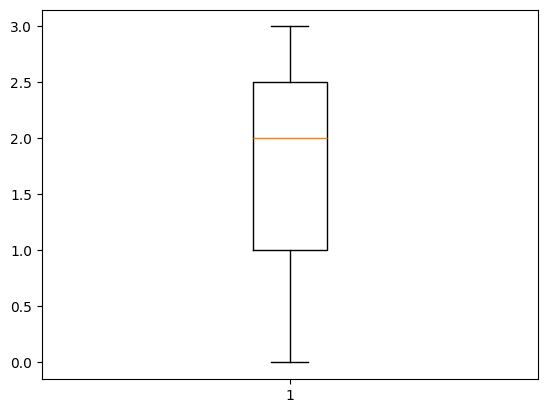

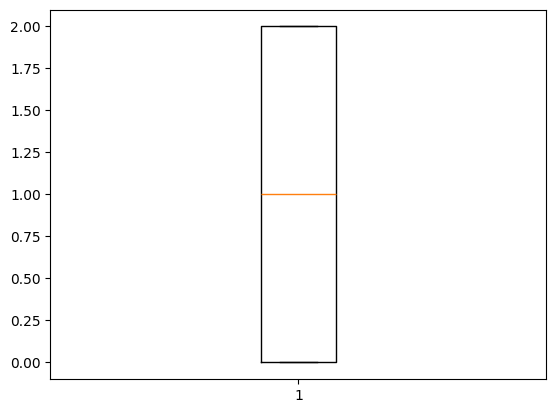

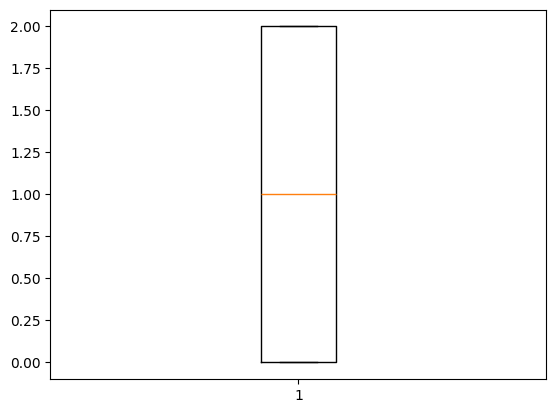

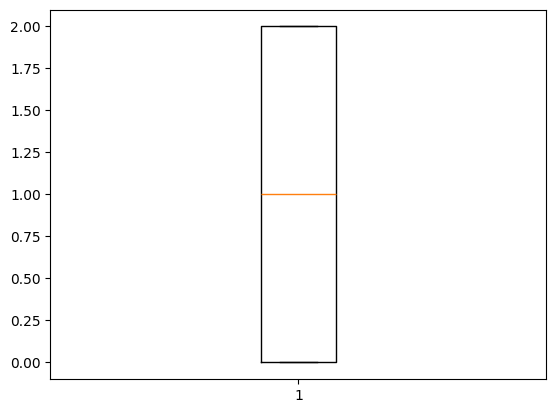

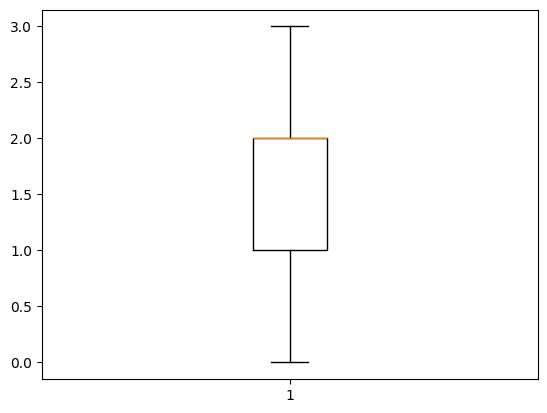

In [14]:
for i in cols:
    plt.boxplot(df[i],data=df)
    plt.show()

In [15]:
X = df.drop(columns=['unacc'])  
y = df['unacc']  


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
from sklearn.metrics import classification_report

In [19]:
y_pred = clf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.24%


In [21]:
print('classification report')
print(classification_report(y_pred,y_test))

classification report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.67      0.91      0.77        11
           2       1.00      0.99      0.99       239
           3       0.88      0.79      0.83        19

    accuracy                           0.96       346
   macro avg       0.87      0.91      0.88       346
weighted avg       0.97      0.96      0.96       346



In [22]:
# important features
feature_importance = clf.feature_importances_
feature_names = X.columns

In [23]:
feature_names

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low'], dtype='object')

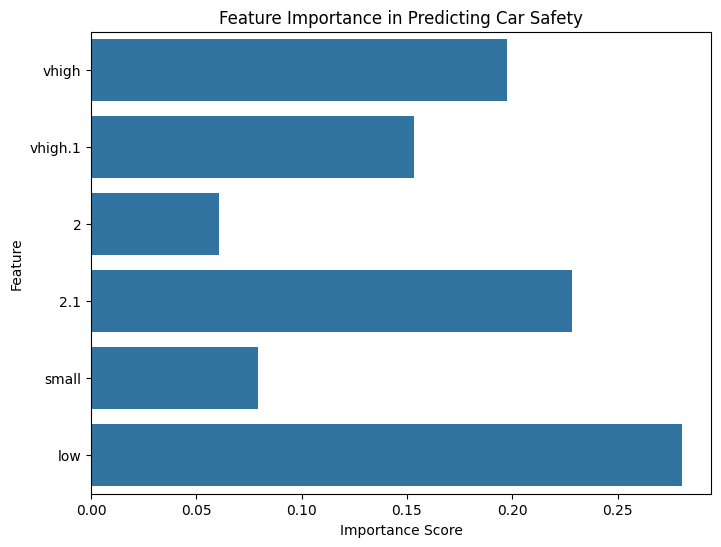

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance in Predicting Car Safety')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

In [4]:
df = pd.read_csv('car_evaluation.csv')

In [5]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df.shape

(1727, 7)

In [10]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(1727, 7)

In [14]:
le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [15]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


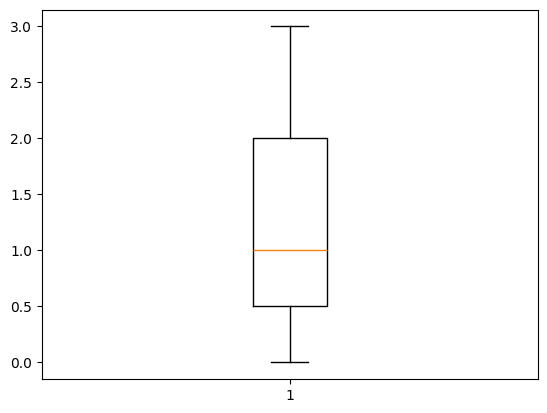

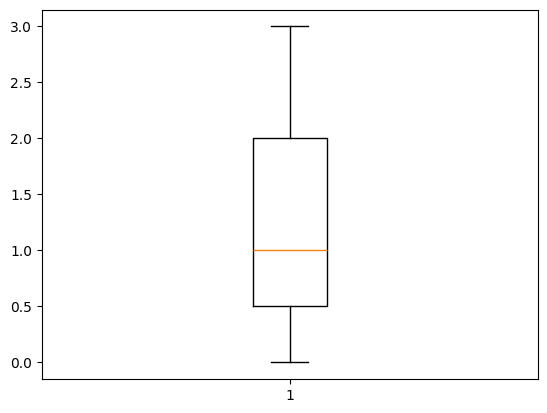

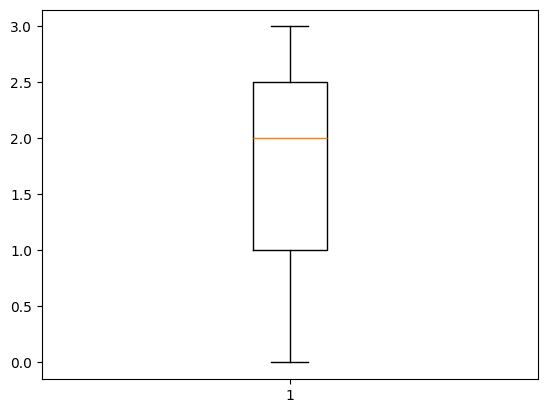

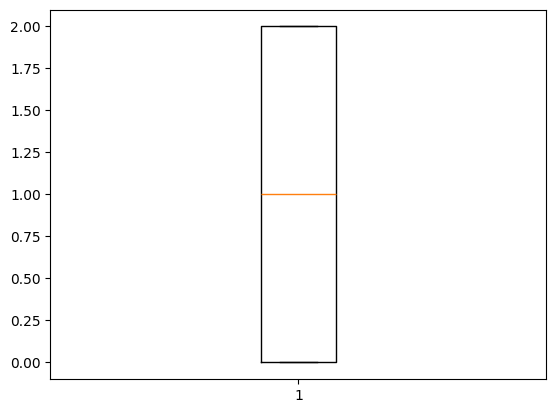

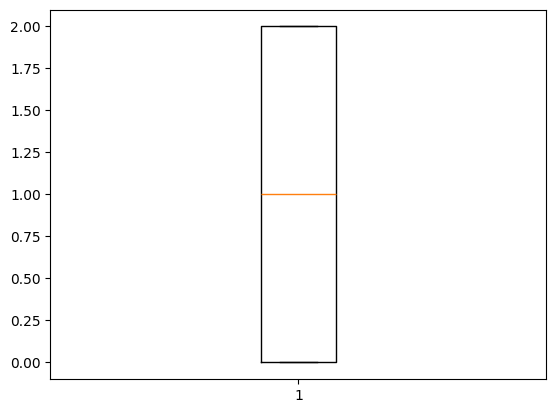

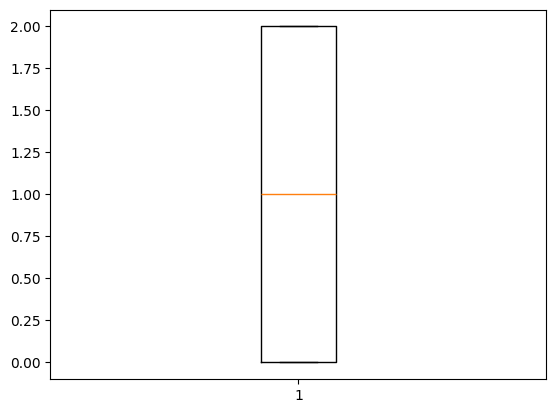

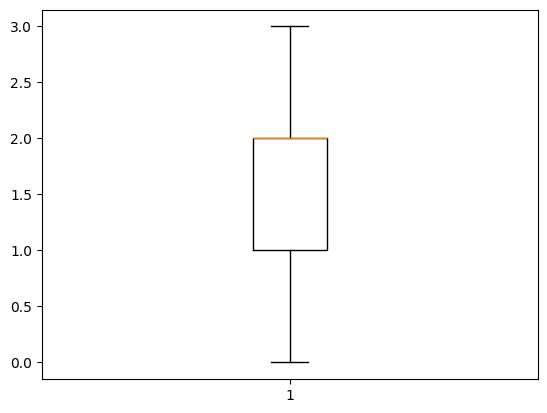

In [16]:
for i in df.columns:
    plt.boxplot(df[i] , data=df)
    plt.show()

In [17]:
x = df.drop(columns=['unacc'])
y = df['unacc']

In [18]:
x

,vhigh,vhigh.1,2,2.1,small,low
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [19]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1722    1
1723    3
1724    2
1725    1
1726    3
Name: unacc, Length: 1727, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [24]:
x_train_scale = sc.fit_transform(x_train)

In [25]:
x_test_scale = sc.transform(x_test)

In [27]:
clf = RandomForestClassifier(n_estimators=100,random_state=42)

In [28]:
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = clf.predict(x_test)

In [30]:
features_importance = clf.feature_importances_

In [31]:
features_name=x.columns

In [32]:
features_name

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low'], dtype='object')

In [33]:
acc = accuracy_score(y_test,y_pred)
print(f'accuracy is {acc *100:.2f} %')


accuracy is 96.24 %


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



In [35]:
features_importance

array([0.19764167, 0.15312099, 0.06098413, 0.22855529, 0.07936845,
       0.28032948])

In [37]:
import seaborn as sns

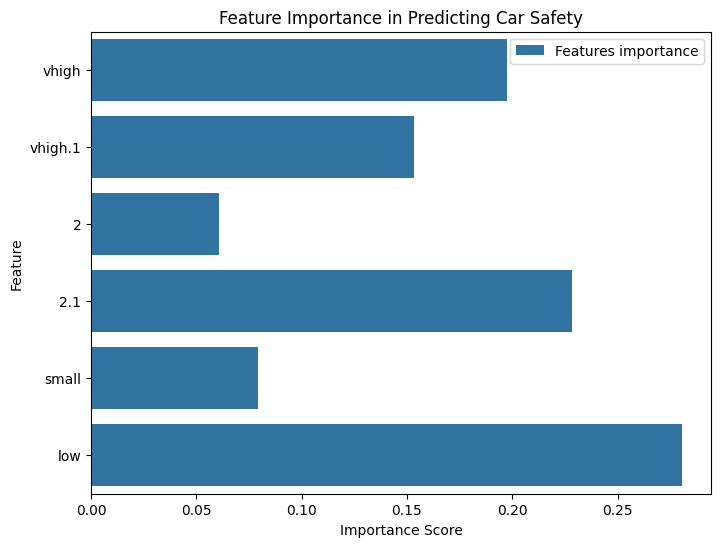

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x=features_importance , y=features_name , label = 'Features importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Car Safety')
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# sns.barplot(x=feature_importance, y=feature_names)
# plt.title('Feature Importance in Predicting Car Safety')
# plt.xlabel('Importance Score')
# plt.ylabel('Feature')
# plt.show()